In [136]:
library(tidyverse)
library(magrittr)
library(caret)
library(zeallot)
source("R/hte_caret.R")

In [71]:
model_specs = list(
gbm = expand.grid(n.trees = seq(1,501,20), 
                  interaction.depth=3, 
                  shrinkage = 0.1, 
                  n.minobsinnode=3),
glmnet = expand.grid(alpha=c(0,0.5,1),
                     lambda=exp(seq(-5,2,0.2)))
)

In [3]:
make_matrix = function(x) stats::model.matrix(~.-1, x)

In [108]:
n = 2000
x = data.frame("covariate_1" = rnorm(n), "covariate_2"= rnorm(n)) %>% make_matrix
logit_p = (x %*% c(1,1))
p = exp(logit_p)/(1+exp(logit_p))
# p = 0.5
w = rbinom(n,1,p)==1
tau = (x %*% c(1,1))^2
y = (x %*% c(1,-3) + tau/2*(2*w-1) + rnorm(n))[,1]
ybin = factor(ifelse(y>0, "treated", "control"))
weights = rnorm(n,1,0)
i_tr = 1:floor(n*0.5)

In [109]:
muhat_val = cross_validated_cross_estimation(x[-i_tr,], y[-i_tr], model_specs) 
phat_val = cross_validated_cross_estimation(x[-i_tr,], w[-i_tr], model_specs)
a = y[-i_tr] - muhat_val
b = w[-i_tr] - phat_val

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.1797             nan     0.1000    0.9593
     2        8.3574             nan     0.1000    0.7799
     3        7.5770             nan     0.1000    0.7362
     4        6.8997             nan     0.1000    0.6286
     5        6.4064             nan     0.1000    0.4591
     6        5.9707             nan     0.1000    0.4045
     7        5.5400             nan     0.1000    0.4085
     8        5.1510             nan     0.1000    0.3898
     9        4.7592             nan     0.1000    0.3498
    10        4.4039             nan     0.1000    0.3233
    20        2.6046             nan     0.1000    0.0882
    40        1.7036             nan     0.1000    0.0094
    60        1.5333             nan     0.1000   -0.0059
    80        1.4388             nan     0.1000   -0.0023
   100        1.3484             nan     0.1000   -0.0048
   120        1.2835             nan     0.1000    0.0014
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.0603             nan     0.1000    0.8567
     2        8.0861             nan     0.1000    0.9634
     3        7.3348             nan     0.1000    0.7217
     4        6.6581             nan     0.1000    0.6528
     5        6.0202             nan     0.1000    0.5263
     6        5.5069             nan     0.1000    0.4795
     7        5.0971             nan     0.1000    0.3921
     8        4.7399             nan     0.1000    0.3098
     9        4.3548             nan     0.1000    0.3606
    10        4.1161             nan     0.1000    0.1710
    20        2.3029             nan     0.1000    0.0713
    40        1.4819             nan     0.1000   -0.0015
    60        1.3275             nan     0.1000   -0.0061
    80        1.2310             nan     0.1000   -0.0077
   100        1.1712             nan     0.1000   -0.0024
   120        1.1209             nan     0.1000   -0.0080
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        8.4504             nan     0.1000    0.9154
     2        7.6459             nan     0.1000    0.7698
     3        6.9676             nan     0.1000    0.6344
     4        6.3437             nan     0.1000    0.5717
     5        5.8179             nan     0.1000    0.5077
     6        5.2976             nan     0.1000    0.4801
     7        4.9035             nan     0.1000    0.3885
     8        4.5155             nan     0.1000    0.3623
     9        4.2249             nan     0.1000    0.2390
    10        3.8876             nan     0.1000    0.3042
    20        2.2726             nan     0.1000    0.0688
    40        1.5443             nan     0.1000   -0.0009
    60        1.4045             nan     0.1000   -0.0033
    80        1.3191             nan     0.1000   -0.0103
   100        1.2515             nan     0.1000   -0.0099
   120        1.2003             nan     0.1000   -0.0083
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.0267             nan     0.1000    1.0068
     2        8.2474             nan     0.1000    0.7505
     3        7.5183             nan     0.1000    0.7358
     4        6.7820             nan     0.1000    0.7291
     5        6.1441             nan     0.1000    0.5535
     6        5.5844             nan     0.1000    0.4557
     7        5.1690             nan     0.1000    0.2783
     8        4.7051             nan     0.1000    0.4270
     9        4.3795             nan     0.1000    0.3361
    10        4.0574             nan     0.1000    0.3272
    20        2.2072             nan     0.1000    0.1228
    40        1.3083             nan     0.1000   -0.0068
    60        1.1764             nan     0.1000   -0.0010
    80        1.1034             nan     0.1000   -0.0032
   100        1.0451             nan     0.1000   -0.0033
   120        1.0010             nan     0.1000   -0.0058
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        8.5073             nan     0.1000    0.8296
     2        7.6897             nan     0.1000    0.8000
     3        6.9836             nan     0.1000    0.6883
     4        6.4123             nan     0.1000    0.5075
     5        5.8891             nan     0.1000    0.4824
     6        5.4405             nan     0.1000    0.4180
     7        4.9946             nan     0.1000    0.4055
     8        4.6203             nan     0.1000    0.3295
     9        4.2747             nan     0.1000    0.2994
    10        3.9697             nan     0.1000    0.2940
    20        2.2859             nan     0.1000    0.0657
    40        1.5213             nan     0.1000   -0.0026
    60        1.3666             nan     0.1000   -0.0035
    80        1.2786             nan     0.1000   -0.0143
   100        1.2205             nan     0.1000   -0.0082
   120        1.1632             nan     0.1000   -0.0027
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3433             nan     0.1000    0.0167
     2        1.3064             nan     0.1000    0.0188
     3        1.2814             nan     0.1000    0.0109
     4        1.2519             nan     0.1000    0.0130
     5        1.2260             nan     0.1000    0.0084
     6        1.2069             nan     0.1000    0.0063
     7        1.1876             nan     0.1000    0.0072
     8        1.1715             nan     0.1000    0.0044
     9        1.1561             nan     0.1000    0.0053
    10        1.1429             nan     0.1000    0.0029
    20        1.0583             nan     0.1000    0.0028
    40        0.9758             nan     0.1000   -0.0023
    60        0.9331             nan     0.1000   -0.0009
    80        0.8901             nan     0.1000   -0.0014
   100        0.8574             nan     0.1000   -0.0009
   120        0.8277             nan     0.1000   -0.0027
   140        

In [125]:
r_model = R_learner_cv(x[i_tr,], w[i_tr], y[i_tr], 
                      model_specs, model_specs, model_specs, k_folds_cv=5) 
tauhat_r_te = predict(r_model, newdata=x[-i_tr,])
tauhat_r_tr = predict(r_model, newdata=x[i_tr,])

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.3593             nan     0.1000    0.9192
     2        8.5259             nan     0.1000    0.8236
     3        7.7799             nan     0.1000    0.7127
     4        7.1816             nan     0.1000    0.5155
     5        6.6551             nan     0.1000    0.4585
     6        6.1581             nan     0.1000    0.3931
     7        5.7106             nan     0.1000    0.3307
     8        5.3233             nan     0.1000    0.3516
     9        5.0041             nan     0.1000    0.2375
    10        4.6893             nan     0.1000    0.2271
    20        2.8288             nan     0.1000    0.0693
    40        2.0079             nan     0.1000   -0.0203
    60        1.8050             nan     0.1000   -0.0083
    80        1.7179             nan     0.1000   -0.0079
   100        1.6407             nan     0.1000   -0.0065
   120        1.5600             nan     0.1000   -0.0167
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.5229             nan     0.1000    0.9597
     2        8.7179             nan     0.1000    0.7562
     3        7.9506             nan     0.1000    0.6116
     4        7.2912             nan     0.1000    0.6149
     5        6.7077             nan     0.1000    0.5225
     6        6.1404             nan     0.1000    0.5625
     7        5.7487             nan     0.1000    0.3849
     8        5.3757             nan     0.1000    0.3528
     9        5.0202             nan     0.1000    0.3549
    10        4.7038             nan     0.1000    0.2736
    20        2.9054             nan     0.1000    0.0429
    40        2.0279             nan     0.1000    0.0024
    60        1.8163             nan     0.1000    0.0035
    80        1.7450             nan     0.1000   -0.0090
   100        1.6727             nan     0.1000   -0.0200
   120        1.5976             nan     0.1000   -0.0255
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.1848             nan     0.1000    0.8650
     2        8.3422             nan     0.1000    0.6964
     3        7.6734             nan     0.1000    0.5497
     4        7.0064             nan     0.1000    0.6290
     5        6.4241             nan     0.1000    0.5242
     6        5.9193             nan     0.1000    0.4427
     7        5.4932             nan     0.1000    0.4258
     8        5.1496             nan     0.1000    0.3285
     9        4.7869             nan     0.1000    0.3141
    10        4.4857             nan     0.1000    0.2453
    20        2.7967             nan     0.1000    0.0262
    40        2.0903             nan     0.1000   -0.0360
    60        1.9223             nan     0.1000   -0.0201
    80        1.8449             nan     0.1000   -0.0182
   100        1.7442             nan     0.1000   -0.0079
   120        1.6877             nan     0.1000   -0.0145
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.4612             nan     0.1000    1.0907
     2        8.5815             nan     0.1000    0.7795
     3        7.8007             nan     0.1000    0.8060
     4        7.0950             nan     0.1000    0.6787
     5        6.4352             nan     0.1000    0.6083
     6        5.8999             nan     0.1000    0.4677
     7        5.4509             nan     0.1000    0.3886
     8        5.0418             nan     0.1000    0.3943
     9        4.6315             nan     0.1000    0.2805
    10        4.3359             nan     0.1000    0.2795
    20        2.4475             nan     0.1000    0.0458
    40        1.6028             nan     0.1000   -0.0026
    60        1.4388             nan     0.1000   -0.0559
    80        1.3351             nan     0.1000   -0.0072
   100        1.2626             nan     0.1000   -0.0054
   120        1.1985             nan     0.1000   -0.0045
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.2134             nan     0.1000    0.9203
     2        8.3535             nan     0.1000    0.8930
     3        7.5871             nan     0.1000    0.6582
     4        6.9724             nan     0.1000    0.6002
     5        6.4207             nan     0.1000    0.4312
     6        5.8340             nan     0.1000    0.4180
     7        5.4369             nan     0.1000    0.3378
     8        5.0479             nan     0.1000    0.3529
     9        4.7241             nan     0.1000    0.2944
    10        4.4756             nan     0.1000    0.1271
    20        2.6231             nan     0.1000    0.1081
    40        1.7671             nan     0.1000   -0.0051
    60        1.6142             nan     0.1000   -0.0080
    80        1.5059             nan     0.1000   -0.0126
   100        1.4551             nan     0.1000   -0.0047
   120        1.4035             nan     0.1000   -0.0086
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3492             nan     0.1000    0.0180
     2        1.3133             nan     0.1000    0.0151
     3        1.2854             nan     0.1000    0.0121
     4        1.2563             nan     0.1000    0.0120
     5        1.2332             nan     0.1000    0.0090
     6        1.2153             nan     0.1000    0.0047
     7        1.1964             nan     0.1000    0.0069
     8        1.1818             nan     0.1000    0.0051
     9        1.1652             nan     0.1000    0.0057
    10        1.1516             nan     0.1000    0.0045
    20        1.0758             nan     0.1000   -0.0005
    40        1.0201             nan     0.1000   -0.0011
    60        0.9814             nan     0.1000   -0.0012
    80        0.9544             nan     0.1000   -0.0008
   100        0.9239             nan     0.1000   -0.0017
   120        0.8987             nan     0.1000   -0.0020
   140        

Warning message:
In resamples.default(models): 'gbm' did not have 'returnResamp="final"; the optimal tuning parameters are usedWarning message:
In resamples.default(models): 'glmnet' did not have 'returnResamp="final"; the optimal tuning parameters are used

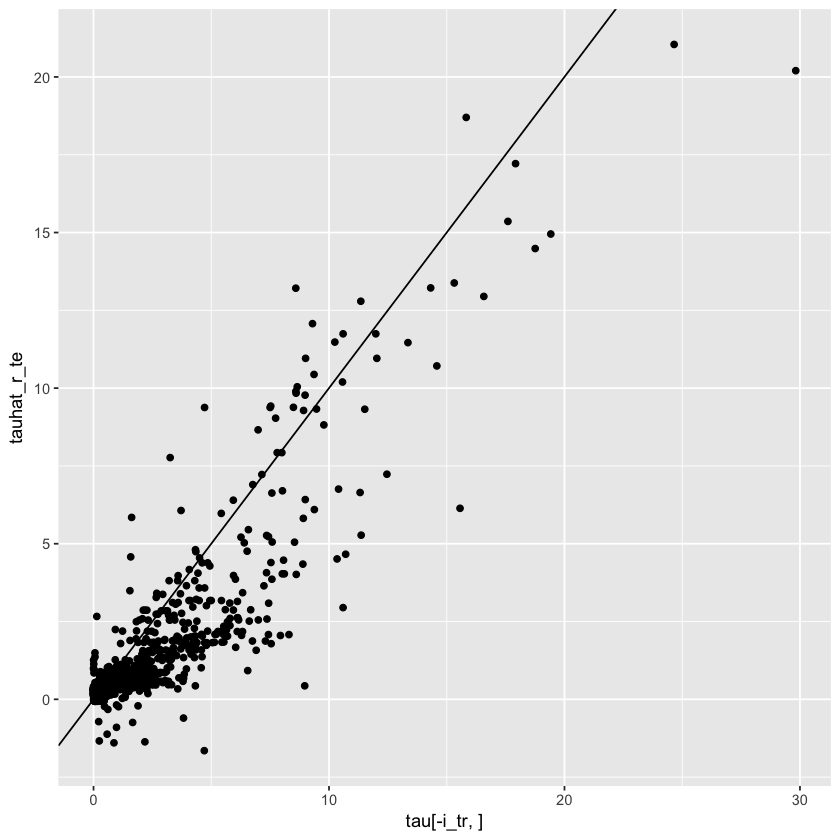

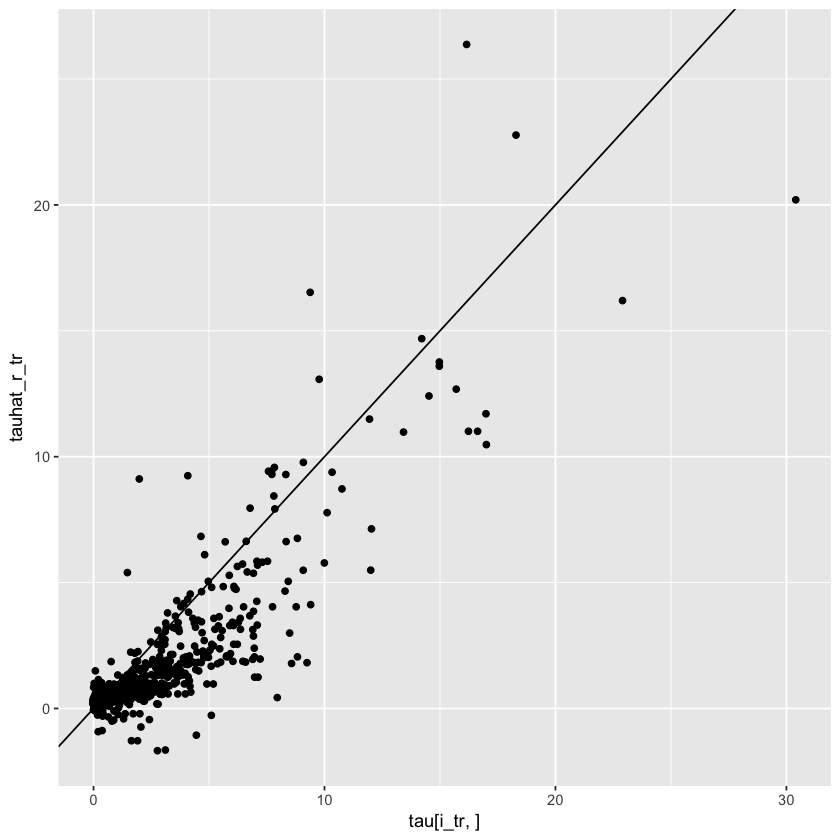

In [126]:
qplot(tau[-i_tr,], tauhat_r_te) + geom_abline(slope=1)
qplot(tau[i_tr,], tauhat_r_tr) + geom_abline(slope=1)

In [142]:
pp = R_learners_pred_test(i_tr, x, w, y, model_specs, model_specs, model_specs)

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.1616             nan     0.1000    0.9346
     2        8.4237             nan     0.1000    0.7112
     3        7.6947             nan     0.1000    0.6876
     4        7.0664             nan     0.1000    0.5908
     5        6.5194             nan     0.1000    0.5338
     6        5.9915             nan     0.1000    0.4140
     7        5.5517             nan     0.1000    0.3326
     8        5.1034             nan     0.1000    0.3875
     9        4.7725             nan     0.1000    0.2472
    10        4.4714             nan     0.1000    0.2848
    20        2.7095             nan     0.1000    0.0751
    40        1.8867             nan     0.1000   -0.0005
    60        1.7303             nan     0.1000   -0.0108
    80        1.6233             nan     0.1000   -0.0102
   100        1.5379             nan     0.1000   -0.0131
   120        1.4505             nan     0.1000   -0.0061
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.4058             nan     0.1000    0.8158
     2        8.5695             nan     0.1000    0.8146
     3        7.8579             nan     0.1000    0.6482
     4        7.2544             nan     0.1000    0.5357
     5        6.6877             nan     0.1000    0.4888
     6        6.2407             nan     0.1000    0.4667
     7        5.7353             nan     0.1000    0.4046
     8        5.3324             nan     0.1000    0.4003
     9        5.0142             nan     0.1000    0.2991
    10        4.6847             nan     0.1000    0.2837
    20        2.8569             nan     0.1000    0.0818
    40        2.0448             nan     0.1000   -0.0092
    60        1.8355             nan     0.1000   -0.0113
    80        1.7125             nan     0.1000   -0.0153
   100        1.6393             nan     0.1000   -0.0143
   120        1.5523             nan     0.1000   -0.0213
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.4597             nan     0.1000    1.1072
     2        8.6357             nan     0.1000    0.7224
     3        7.8302             nan     0.1000    0.6900
     4        7.1340             nan     0.1000    0.6586
     5        6.5861             nan     0.1000    0.4763
     6        6.0352             nan     0.1000    0.4897
     7        5.5857             nan     0.1000    0.3658
     8        5.1205             nan     0.1000    0.3764
     9        4.7639             nan     0.1000    0.3239
    10        4.4117             nan     0.1000    0.2187
    20        2.7824             nan     0.1000    0.0668
    40        2.0290             nan     0.1000   -0.0134
    60        1.8352             nan     0.1000   -0.0032
    80        1.7075             nan     0.1000   -0.0184
   100        1.5846             nan     0.1000   -0.0184
   120        1.4935             nan     0.1000   -0.0163
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.1243             nan     0.1000    0.9665
     2        8.2606             nan     0.1000    0.9102
     3        7.4559             nan     0.1000    0.7673
     4        6.8377             nan     0.1000    0.5641
     5        6.2185             nan     0.1000    0.5949
     6        5.6973             nan     0.1000    0.4686
     7        5.2280             nan     0.1000    0.4139
     8        4.7788             nan     0.1000    0.4246
     9        4.4220             nan     0.1000    0.2293
    10        4.1170             nan     0.1000    0.2643
    20        2.3304             nan     0.1000    0.0556
    40        1.5016             nan     0.1000    0.0022
    60        1.3478             nan     0.1000   -0.0118
    80        1.2703             nan     0.1000   -0.0040
   100        1.2080             nan     0.1000   -0.0141
   120        1.1638             nan     0.1000   -0.0055
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regression

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.1498             nan     0.1000    0.8755
     2        8.2987             nan     0.1000    0.7016
     3        7.5699             nan     0.1000    0.6375
     4        6.8937             nan     0.1000    0.6912
     5        6.3039             nan     0.1000    0.5666
     6        5.7401             nan     0.1000    0.4842
     7        5.3858             nan     0.1000    0.3143
     8        5.0233             nan     0.1000    0.2240
     9        4.7153             nan     0.1000    0.2911
    10        4.4137             nan     0.1000    0.2701
    20        2.7629             nan     0.1000    0.0612
    40        1.9998             nan     0.1000   -0.0130
    60        1.8526             nan     0.1000   -0.0048
    80        1.7411             nan     0.1000   -0.0156
   100        1.6589             nan     0.1000   -0.0089
   120        1.5932             nan     0.1000   -0.0170
   140        

Warning message:
In train.default(x = x, y = y, weights = weights, method = method, : cannnot compute class probabilities for regressionWarning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3436             nan     0.1000    0.0198
     2        1.2992             nan     0.1000    0.0140
     3        1.2675             nan     0.1000    0.0131
     4        1.2392             nan     0.1000    0.0091
     5        1.2103             nan     0.1000    0.0104
     6        1.1874             nan     0.1000    0.0081
     7        1.1687             nan     0.1000    0.0050
     8        1.1489             nan     0.1000    0.0063
     9        1.1367             nan     0.1000    0.0044
    10        1.1197             nan     0.1000    0.0058
    20        1.0400             nan     0.1000   -0.0011
    40        0.9775             nan     0.1000   -0.0018
    60        0.9334             nan     0.1000   -0.0012
    80        0.8940             nan     0.1000   -0.0010
   100        0.8632             nan     0.1000   -0.0038
   120        0.8306             nan     0.1000   -0.0008
   140        

Warning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       12.0298             nan     0.1000    0.1929



Warning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

In [143]:
tmses = pp %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((est_effect - tau[-i_tr])^2))

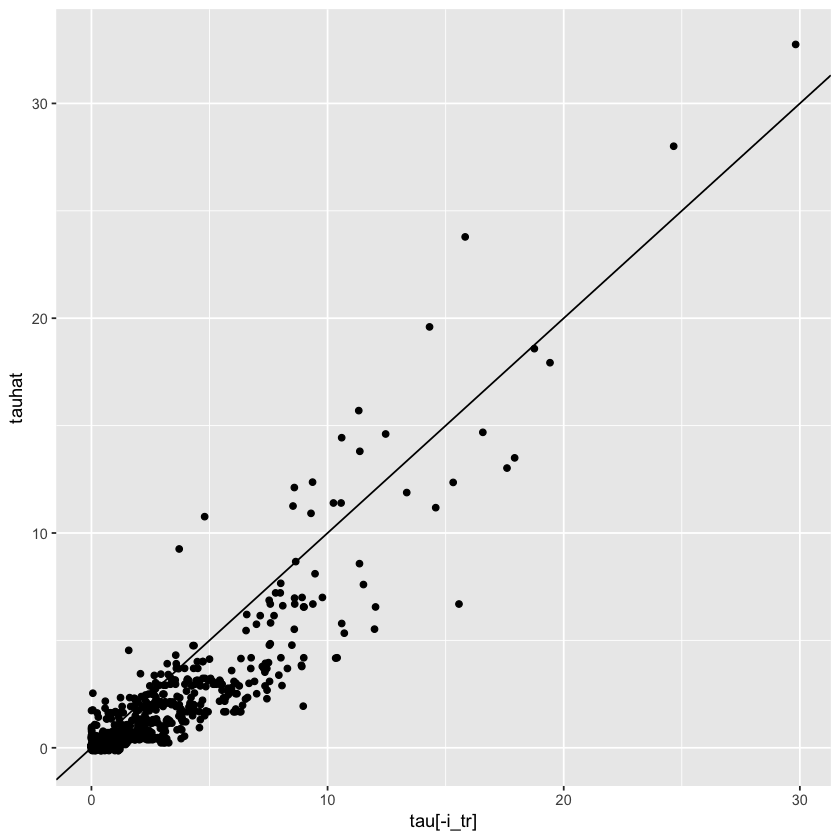

In [144]:
best_model = tmses %>% filter(tmse == min(tmse)) %>% pull(model) %>% last()
tauhat = pp %>% filter(model==best_model) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)

In [145]:
best_model

[1] "gbm@61~3~0.1~3"

In [146]:
tmses_hat = pp %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((a-b*est_effect)^2))

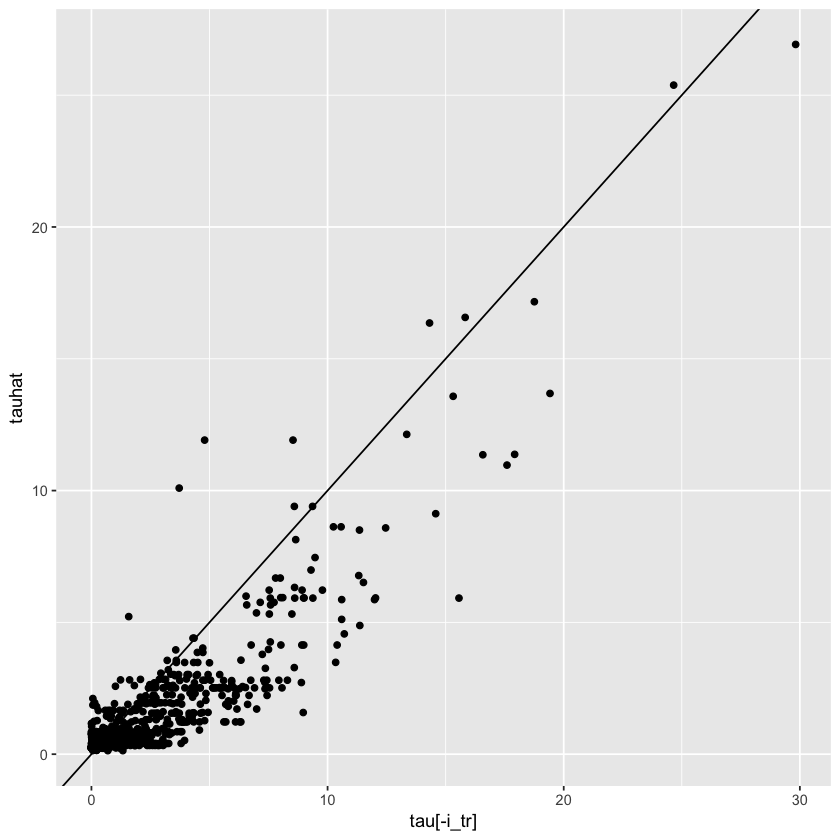

In [147]:
best_model_hat = tmses_hat %>% filter(tmse == min(tmse)) %>% pull(model) %>% first()
tauhat = pp %>% filter(model==best_model_hat) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)

In [148]:
best_model_hat

[1] "gbm@41~3~0.1~3"

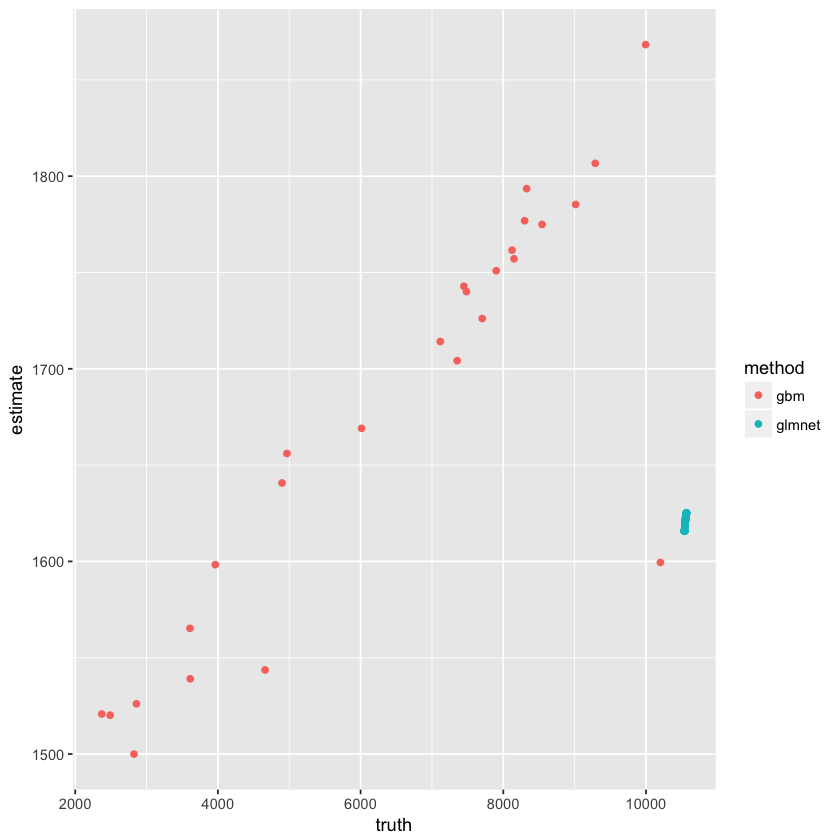

In [149]:
inner_join(tmses, tmses_hat, by="model") %>% 
    rename(truth=tmse.x, estimate=tmse.y) %>%
    separate(model, c("method", "params"), sep="@") %$%
qplot(truth, estimate, color=method) 

----

In [137]:
tau_hat_S = S_learners_pred_test(i_tr, x, w, y, model_specs)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        9.1558             nan     0.1000    0.9148
     2        8.3277             nan     0.1000    0.7949
     3        7.5631             nan     0.1000    0.7589
     4        6.9381             nan     0.1000    0.6160
     5        6.4074             nan     0.1000    0.4750
     6        5.9431             nan     0.1000    0.4106
     7        5.4549             nan     0.1000    0.4713
     8        5.1081             nan     0.1000    0.3066
     9        4.7446             nan     0.1000    0.3161
    10        4.4398             nan     0.1000    0.3004
    20        2.6326             nan     0.1000    0.1083
    40        1.5933             nan     0.1000   -0.0252
    60        1.3712             nan     0.1000    0.0157
    80        1.2320             nan     0.1000   -0.0112
   100        1.1490             nan     0.1000   -0.0059
   120        1.0704             nan     0.1000   -0.0060
   140        

Warning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

In [150]:
tmses = tau_hat_S %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((est_effect - tau[-i_tr])^2))

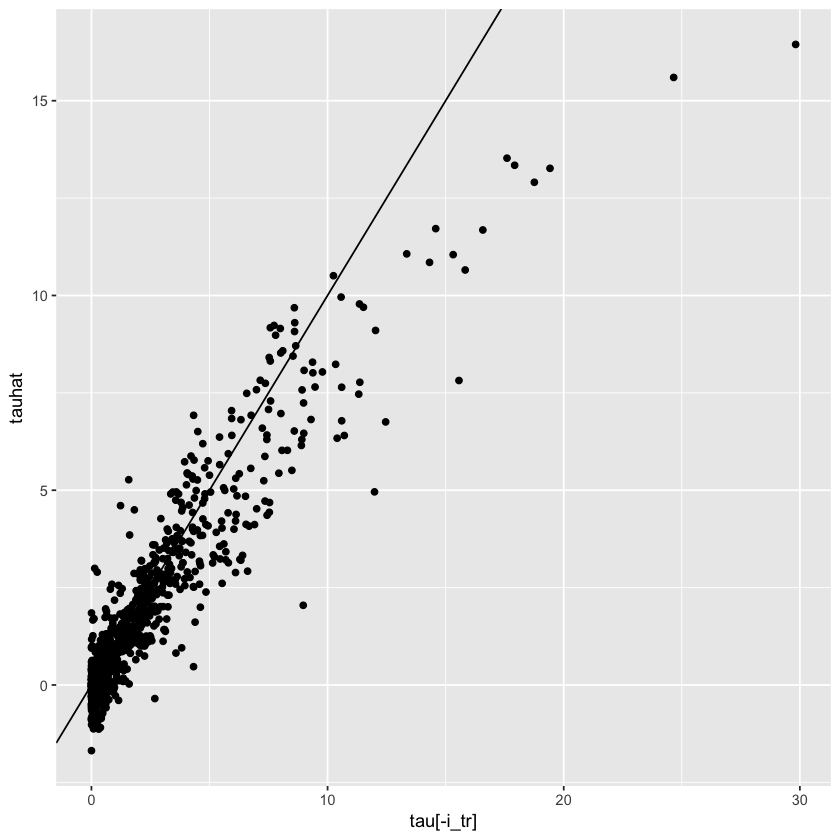

In [151]:
best_model = tmses %>% filter(tmse == min(tmse)) %>% pull(model) %>% last()
tauhat = tau_hat_S %>% filter(model==best_model) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)

In [152]:
tmses_hat = tau_hat_S %>% 
    group_by(model) %>%
    arrange(index) %>%
    summarize(tmse = sum((a-b*est_effect)^2))

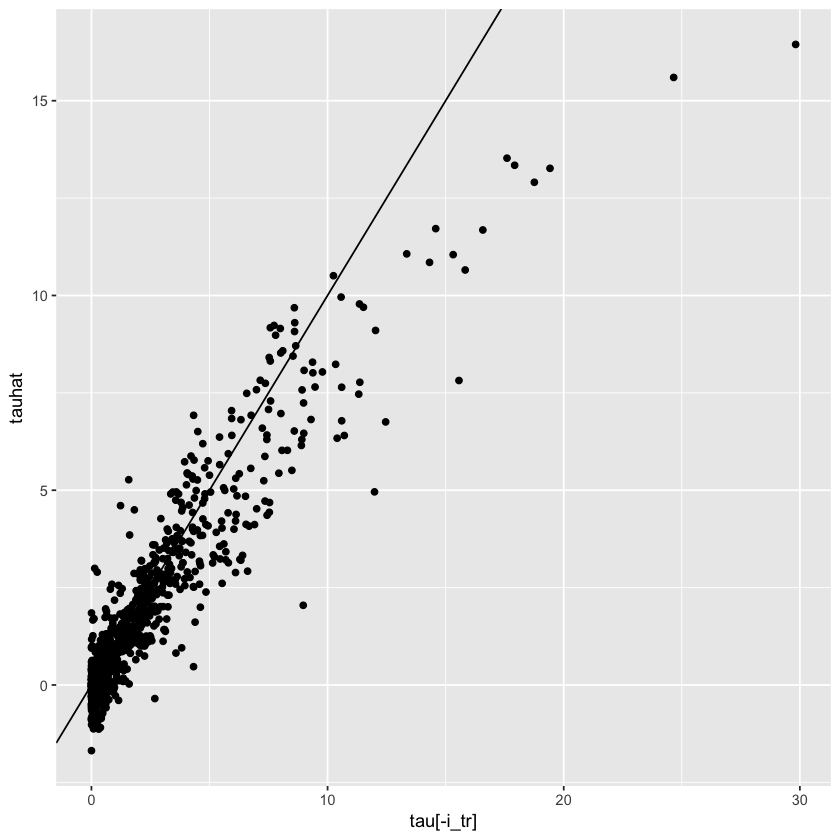

In [153]:
best_model_hat = tmses_hat %>% filter(tmse == min(tmse)) %>% pull(model) %>% last()
tauhat = tau_hat_S %>% filter(model==best_model) %>% pull(est_effect)
qplot(tau[-i_tr], tauhat) + geom_abline(slope=1)

In [154]:
best_model_hat

[1] "gbm@281~3~0.1~3"

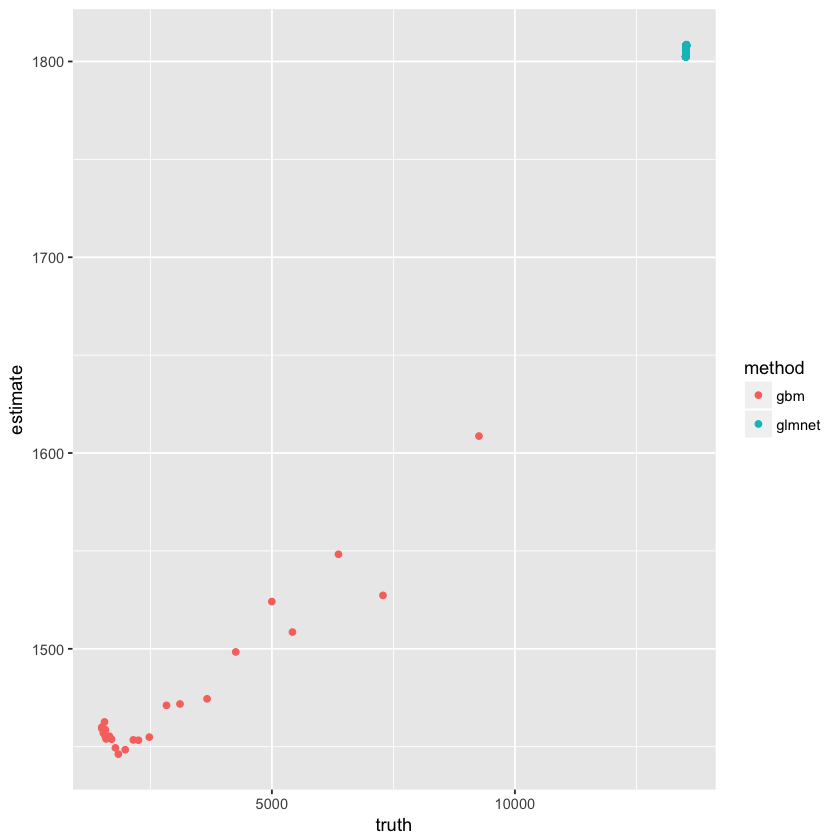

In [155]:
inner_join(tmses, tmses_hat, by="model") %>% 
    rename(truth=tmse.x, estimate=tmse.y) %>%
    separate(model, c("method", "params"), sep="@") %$%
qplot(truth, estimate, color=method) 